# **K = 1 일때, KNN 알고리즘** (Manhattan Distance)

In [1]:
import numpy as np

In [2]:
def generate_random_points(size=10, low=0, high=1):
  return (high - low) * np.random.random_sample((size, 2)) + low

In [3]:
red_points = generate_random_points(20, 0, 1)
blue_points = generate_random_points(20, 1, 2)

In [4]:
def prepare_test_samples(low=0, high=2, step=0.01):
  range = [low, high]
  grid = np.mgrid[low:high+step:step, low:high+step:step]
  test_points = np.vstack([grid[0].ravel(), grid[1].ravel()]).T
  return test_points

In [5]:
t = prepare_test_samples()

In [6]:
def predict(*colored_points, test):

    labels_of_x = [i * np.ones(a_color.shape[0], dtype=np.int) for i, a_color in enumerate(colored_points)] 
    labels_of_x = np.array(labels_of_x).ravel()

    known_points = np.concatenate(colored_points, axis=0)

    predictions = []
    for test_point in test:
      all_distances_from_test_point = np.sum(np.abs(known_points - test_point), axis=1)
      min_index = np.argmin(all_distances_from_test_point)
      predictions.append(labels_of_x[min_index])
    return predictions

In [7]:
a = predict(red_points, blue_points, test=t)

In [8]:
type(a)

list

In [9]:
sum(a)

21268

In [10]:
max(a)

1

In [11]:
len(a)

40401

## **그림으로 나타내기**

In [12]:
import matplotlib.pyplot as plt

In [13]:
def draw(*colored_points, test, title=''):
  _, frame = plt.subplots(dpi=70)
  frame.set_title(title)
  mpl_colors = ('r', 'b', 'g', 'c', 'm', 'y', 'k', 'w')

############################################################################
  for i, x in enumerate(colored_points):
    frame.plot(*x.T, mpl_colors[i] + 'o')

############################################################################    
  number_of_classes = len(colored_points)

  classified = []
  for a_class in range(number_of_classes):
    class_i = np.array([test[i] for i, l in enumerate(a) if l == a_class])
    classified.append(class_i)

  for i, x in enumerate(classified):
    frame.plot(*x.T, mpl_colors[i] + ',')

  return frame

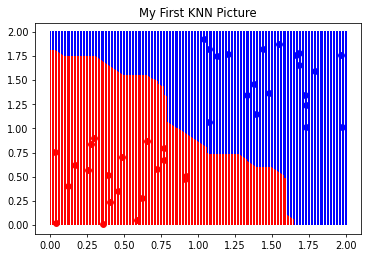

In [14]:
draw(red_points, blue_points, test = t, title='My First KNN Picture')

In [15]:
plt.style.use('default')
plt.style.use('seaborn-talk')

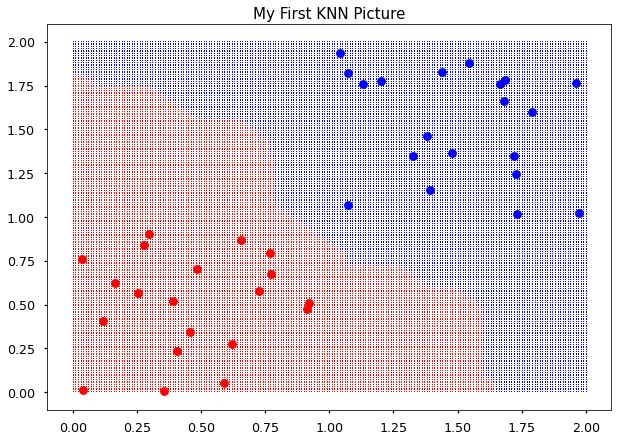

In [16]:
draw(red_points, blue_points, test = t, title='My First KNN Picture')